In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import numpy as np
import glob
from datetime import datetime,timedelta
import re
from wordcloud import WordCloud
from PIL import Image
from collections import Counter

import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.rcParams['font.family']=['NanumGothic', 'sans-serif']
plt.rcParams['axes.unicode_minus'] = False

In [7]:
files = glob.glob('G:\내 드라이브\Colab Notebooks\데이터분석\.data\공공데이터포털\공무원연금공단_대출종류별 대출 추이\*')
files

['G:\\내 드라이브\\Colab Notebooks\\데이터분석\\.data\\공공데이터포털\\공무원연금공단_대출종류별 대출 추이\\공무원연금공단_대출종류별 대출 추이_20211231.csv']

In [8]:
df = pd.read_csv(files[0],encoding='cp949')
df.head()

,연도,구분,합계,학자금대부(계),대여학자금,연금대부학자금,일반대부(계),연금대부,생활안정자금,의료비,...,자립지원자금,전세자금,주택조합대부,주택매입신축,은행자금(계),봉급자신용대출,공무원생활지원급부,해외주재공무원대출,연금수급자융자알선,주택자금융자알선
0,1982,건수,218221,133131,124748,8383,38255,0,36219,1417,...,0,0,0,0,46835,40611,0,0,0,6224
1,1982,금액,143827,36967,34763,2204,20360,0,18110,675,...,0,0,0,0,86500,40325,0,0,0,46175
2,1983,건수,235943,145362,134686,10676,48660,0,44115,1967,...,1179,0,162,0,41921,39348,0,0,0,2573
3,1983,금액,145486,40016,37136,2880,46410,0,37243,1480,...,3464,0,800,0,59060,39053,0,0,0,20007
4,1984,건수,287157,145178,134919,10259,115370,0,112071,2049,...,964,0,0,0,26609,23553,0,0,0,3056


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   연도         80 non-null     int64 
 1   구분         80 non-null     object
 2   합계         80 non-null     int64 
 3   학자금대부(계)   80 non-null     int64 
 4   대여학자금      80 non-null     int64 
 5   연금대부학자금    80 non-null     int64 
 6   일반대부(계)    80 non-null     int64 
 7   연금대부       80 non-null     int64 
 8   생활안정자금     80 non-null     int64 
 9   의료비        80 non-null     int64 
 10  경조비        80 non-null     int64 
 11  재해복구비      80 non-null     int64 
 12  차량구입비      80 non-null     int64 
 13  자립지원자금     80 non-null     int64 
 14  전세자금       80 non-null     int64 
 15  주택조합대부     80 non-null     int64 
 16  주택매입신축     80 non-null     int64 
 17  은행자금(계)    80 non-null     int64 
 18  봉급자신용대출    80 non-null     int64 
 19  공무원생활지원급부  80 non-null     int64 
 20  해외주재공무원대출  80 non-null     int64 


In [10]:
df.describe()

,연도,합계,학자금대부(계),대여학자금,연금대부학자금,일반대부(계),연금대부,생활안정자금,의료비,경조비,...,자립지원자금,전세자금,주택조합대부,주택매입신축,은행자금(계),봉급자신용대출,공무원생활지원급부,해외주재공무원대출,연금수급자융자알선,주택자금융자알선
count,80.000000,8.000000e+01,80.000000,80.00000,80.000000,80.00000,80.000000,80.000000,80.000000,80.00000,...,80.000000,80.00000,80.000000,80.000000,8.000000e+01,8.000000e+01,80.000000,80.000000,80.00000,80.000000
mean,2001.500000,1.363726e+06,269381.225000,262448.76250,6932.462500,230380.76250,177484.700000,27458.562500,1783.687500,5254.07500,...,1884.937500,12334.73750,2085.537500,1851.862500,8.639642e+05,8.134943e+05,8718.800000,30.450000,17193.71250,24526.887500
std,11.616226,1.625175e+06,187212.460959,191044.73018,11070.776526,268316.45548,288522.373244,68995.572319,2580.535675,11394.78129,...,3593.260877,28890.00007,9466.602808,8567.234985,1.247588e+06,1.245387e+06,22773.407838,113.048203,37327.59663,60059.131785
min,1982.000000,1.438270e+05,36967.000000,34763.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,8.823000e+03,0.000000e+00,0.000000,0.000000,0.00000,0.000000
25%,1991.750000,2.885512e+05,143829.750000,128283.50000,0.000000,36887.25000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,5.804275e+04,3.261350e+04,0.000000,0.000000,0.00000,0.000000
50%,2001.500000,4.069355e+05,201889.500000,200911.50000,0.000000,103343.00000,31675.500000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,0.000000,1.472470e+05,1.172565e+05,0.000000,0.000000,0.00000,416.500000
75%,2011.250000,3.217870e+06,412716.750000,396741.00000,12496.000000,483187.50000,483187.500000,0.000000,2987.250000,0.00000,...,1770.500000,6949.50000,0.000000,0.000000,1.991602e+06,1.868437e+06,0.000000,0.000000,7001.00000,9594.750000
max,2021.000000,5.787606e+06,699598.000000,699598.00000,60536.000000,948430.00000,948430.000000,312490.000000,8809.000000,40814.00000,...,16892.000000,121821.00000,75000.000000,54300.000000,4.809138e+06,4.808668e+06,94519.000000,705.000000,131646.00000,308637.000000


In [11]:
df.describe(include=np.object)

,구분
count,80
unique,2
top,건수
freq,40


In [12]:
df1 = df[df['구분']=='건수']
df2 = df[df['구분']=='금액']
df1.reset_index(drop=True,inplace=True)
df2.reset_index(drop=True,inplace=True)

In [15]:
df.columns

Index(['연도', '구분', '합계', '학자금대부(계)', '대여학자금', '연금대부학자금', '일반대부(계) ', '연금대부',
       '생활안정자금', '의료비', '경조비', '재해복구비', '차량구입비', '자립지원자금', '전세자금', '주택조합대부',
       '주택매입신축', '은행자금(계)', '봉급자신용대출', '공무원생활지원급부', '해외주재공무원대출', '연금수급자융자알선',
       '주택자금융자알선'],
      dtype='object')

## 시각화

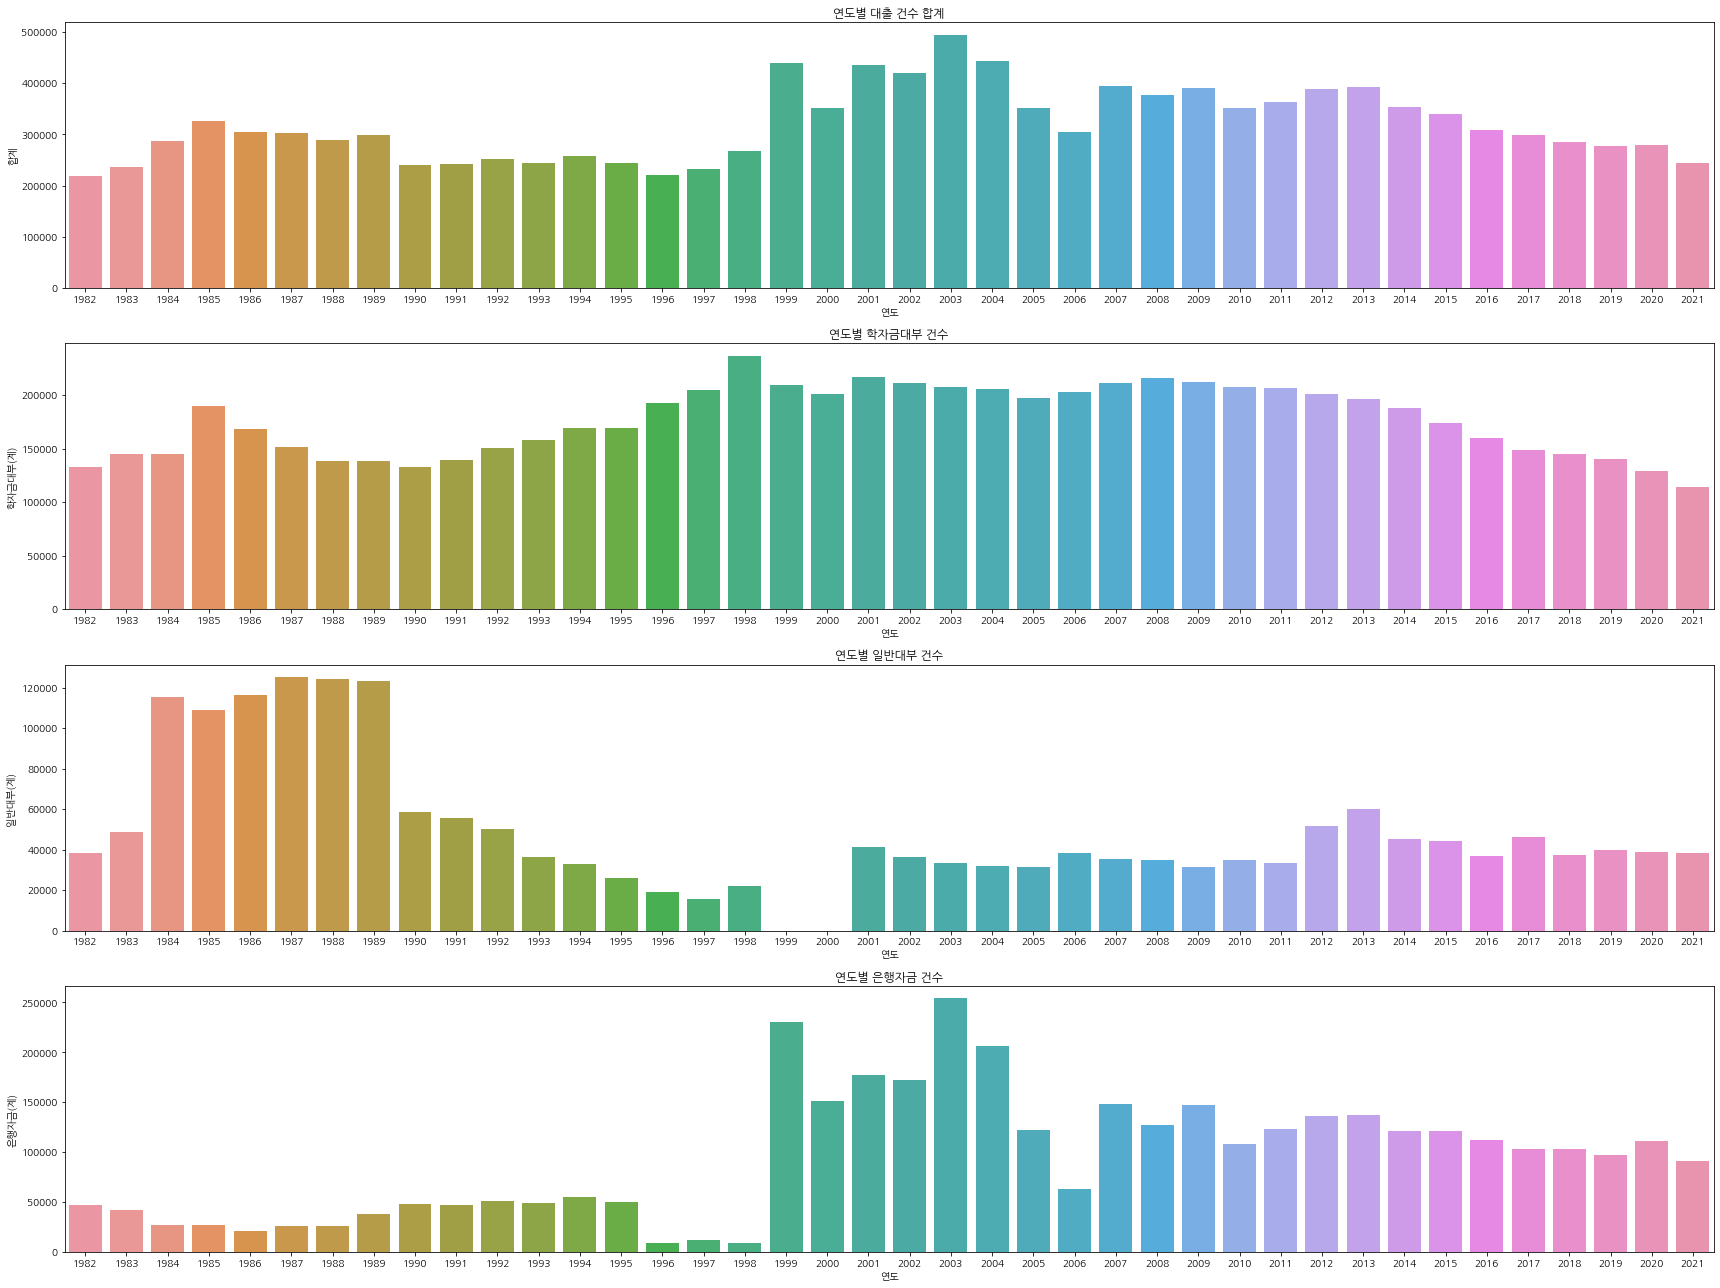

In [122]:
fig,axes = plt.subplots(4,1,figsize=(24,18))
sns.barplot(data=df1,x='연도',y='합계',ax=axes[0]).set(title='연도별 대출 건수 합계')
sns.barplot(data=df1,x='연도',y='학자금대부(계)',ax=axes[1]).set(title='연도별 학자금대부 건수')
sns.barplot(data=df1,x='연도',y='일반대부(계) ',ax=axes[2]).set(title='연도별 일반대부 건수')
sns.barplot(data=df1,x='연도',y='은행자금(계)',ax=axes[3]).set(title='연도별 은행자금 건수')
plt.tight_layout()

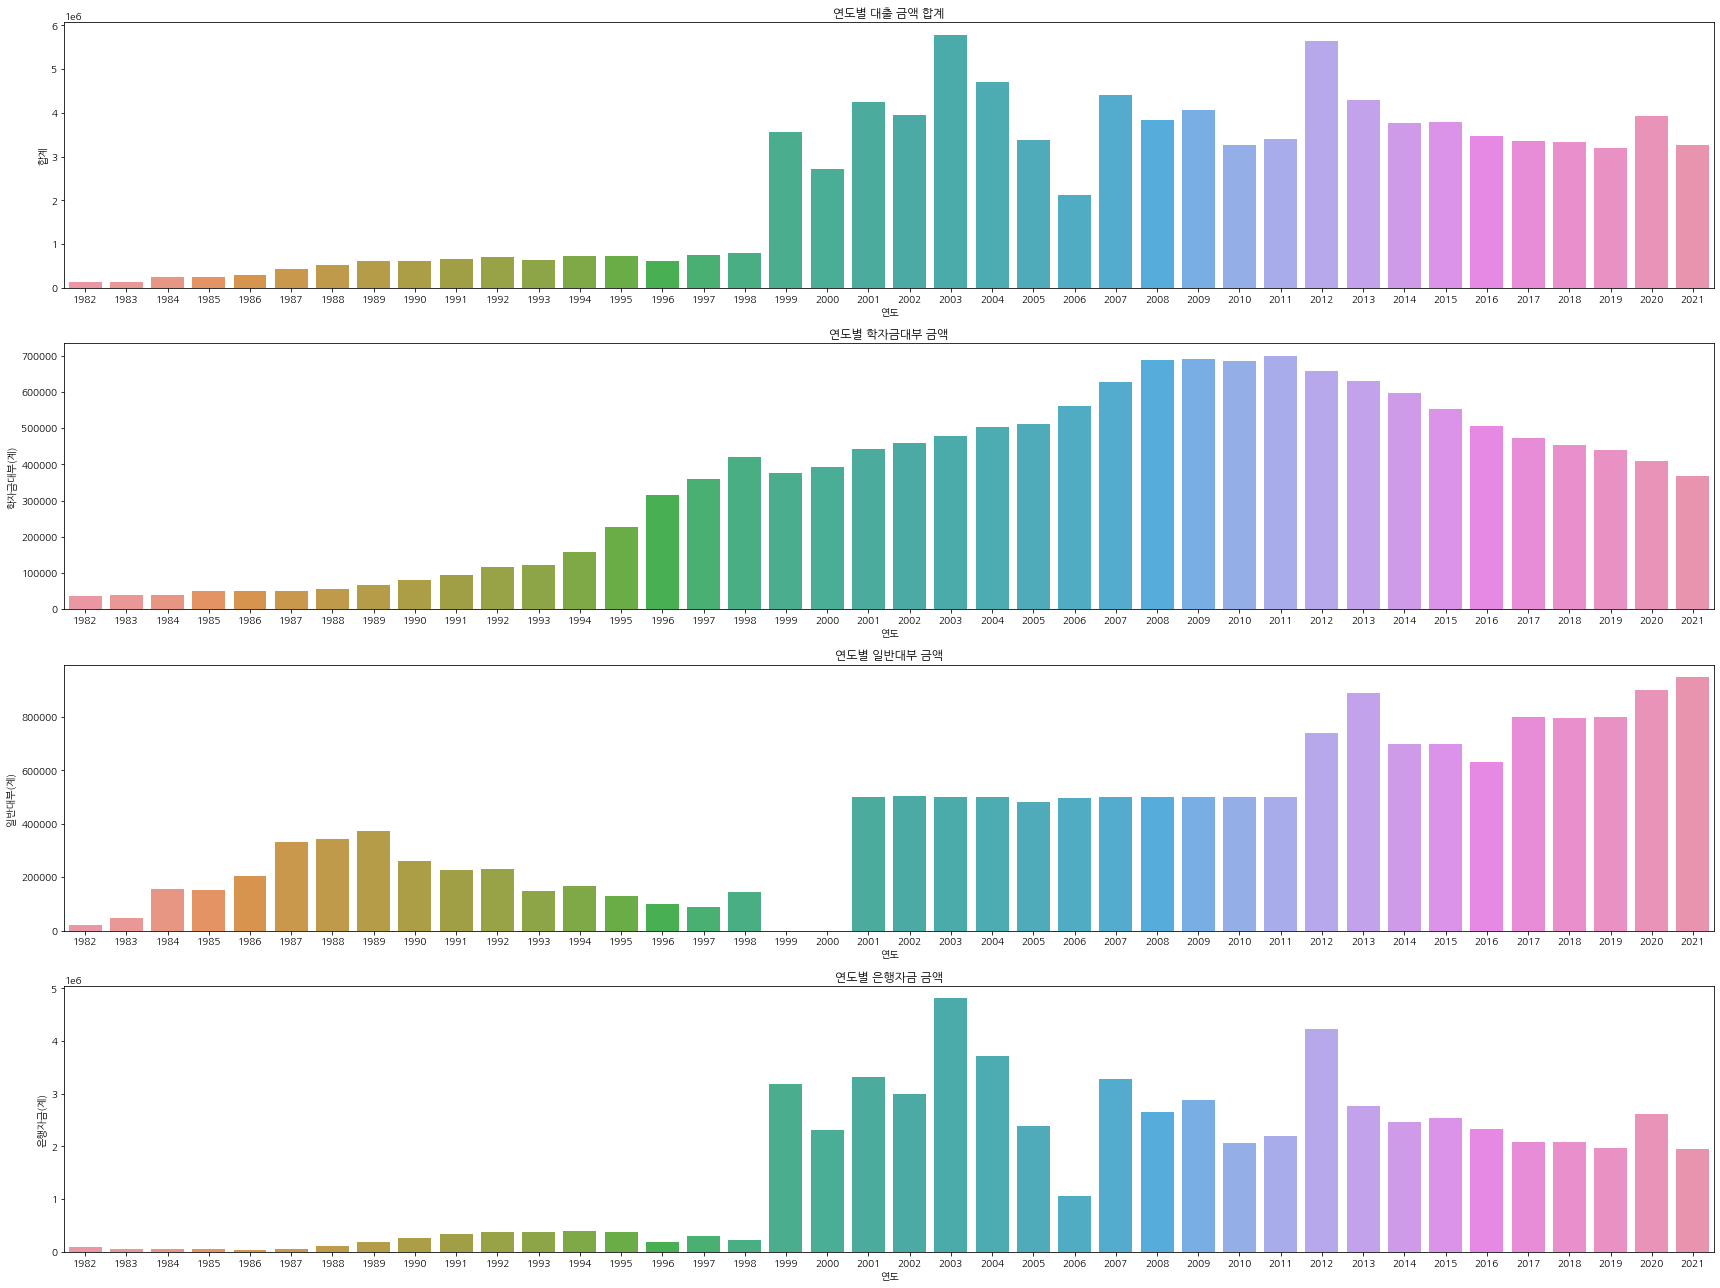

In [124]:
fig,axes = plt.subplots(4,1,figsize=(24,18))
sns.barplot(data=df2,x='연도',y='합계',ax=axes[0]).set(title='연도별 대출 금액 합계')
sns.barplot(data=df2,x='연도',y='학자금대부(계)',ax=axes[1]).set(title='연도별 학자금대부 금액')
sns.barplot(data=df2,x='연도',y='일반대부(계) ',ax=axes[2]).set(title='연도별 일반대부 금액')
sns.barplot(data=df2,x='연도',y='은행자금(계)',ax=axes[3]).set(title='연도별 은행자금 금액')
plt.tight_layout()

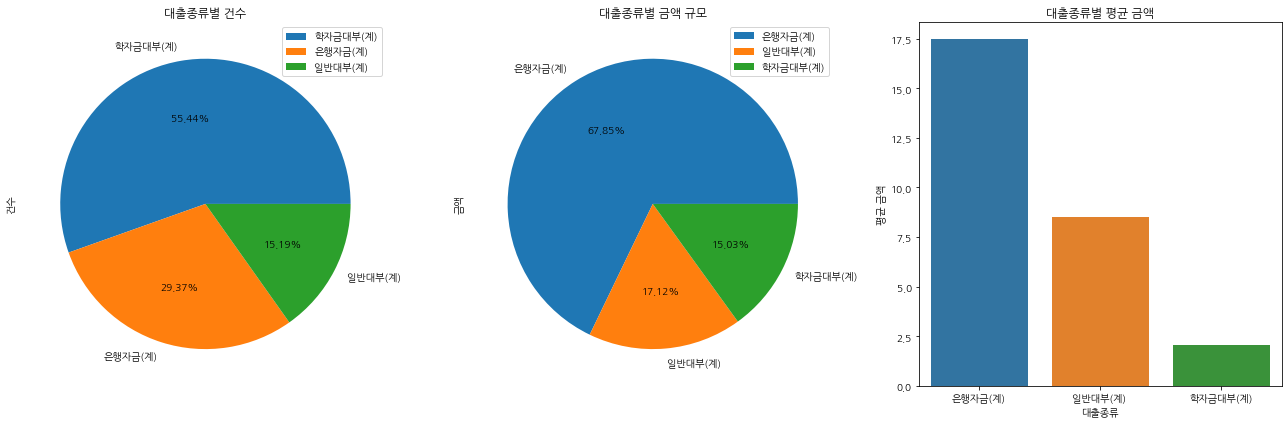

In [111]:
loans = np.array(['학자금대부(계)','일반대부(계) ','은행자금(계)'])
amount1 = df1[loans].sum().values
amount2 = df2[loans].sum().values

pie_df1 = pd.DataFrame(columns=['대출종류','건수'])
pie_df1['대출종류'] = loans
pie_df1['건수'] = amount1
pie_df1 = pie_df1.sort_values('건수',ascending=False)

pie_df2 = pd.DataFrame(columns=['대출종류','금액'])
pie_df2['대출종류'] = loans
pie_df2['금액'] = amount2
pie_df2 = pie_df2.sort_values('금액',ascending=False)

sub_df = pd.DataFrame(columns=['대출종류','평균 금액'])
sub_df['대출종류'] = loans
sub_df['평균 금액'] = amount2/amount1
sub_df = sub_df.sort_values('평균 금액',ascending=False)

_,axes = plt.subplots(1,3,figsize=(18,6))
pie_df1.plot.pie(y='건수',labels=pie_df1['대출종류'].values,autopct='%.2f%%',ax=axes[0],title='대출종류별 건수')
pie_df2.plot.pie(y='금액',labels=pie_df2['대출종류'].values,autopct='%.2f%%',ax=axes[1],title='대출종류별 금액 규모')
sns.barplot(data=sub_df,x='대출종류',y='평균 금액',ax=axes[2]).set(title='대출종류별 평균 금액')
plt.tight_layout()

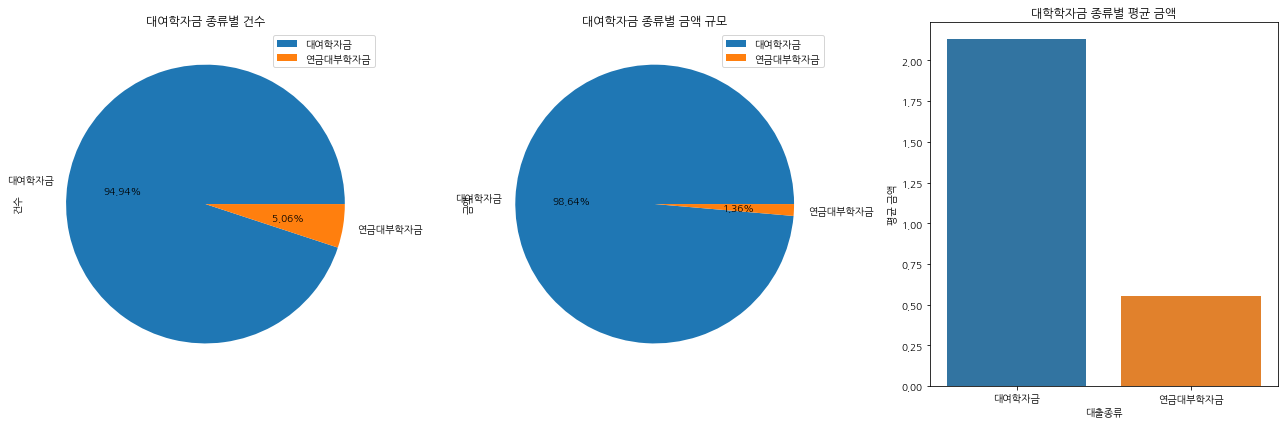

In [116]:
loans = np.array(['대여학자금','연금대부학자금'])
amount1 = df1[loans].sum().values
amount2 = df2[loans].sum().values

pie_df1 = pd.DataFrame(columns=['대출종류','건수'])
pie_df1['대출종류'] = loans
pie_df1['건수'] = amount1
pie_df1 = pie_df1.sort_values('건수',ascending=False)

pie_df2 = pd.DataFrame(columns=['대출종류','금액'])
pie_df2['대출종류'] = loans
pie_df2['금액'] = amount2
pie_df2 = pie_df2.sort_values('금액',ascending=False)

sub_df = pd.DataFrame(columns=['대출종류','평균 금액'])
sub_df['대출종류'] = loans
sub_df['평균 금액'] = amount2/amount1
sub_df = sub_df.sort_values('평균 금액',ascending=False)

_,axes = plt.subplots(1,3,figsize=(18,6))
pie_df1.plot.pie(y='건수',labels=pie_df1['대출종류'].values,autopct='%.2f%%',ax=axes[0],title='대여학자금 종류별 건수')
pie_df2.plot.pie(y='금액',labels=pie_df2['대출종류'].values,autopct='%.2f%%',ax=axes[1],title='대여학자금 종류별 금액 규모')
sns.barplot(data=sub_df,x='대출종류',y='평균 금액',ax=axes[2]).set(title='대학학자금 종류별 평균 금액')
plt.tight_layout()

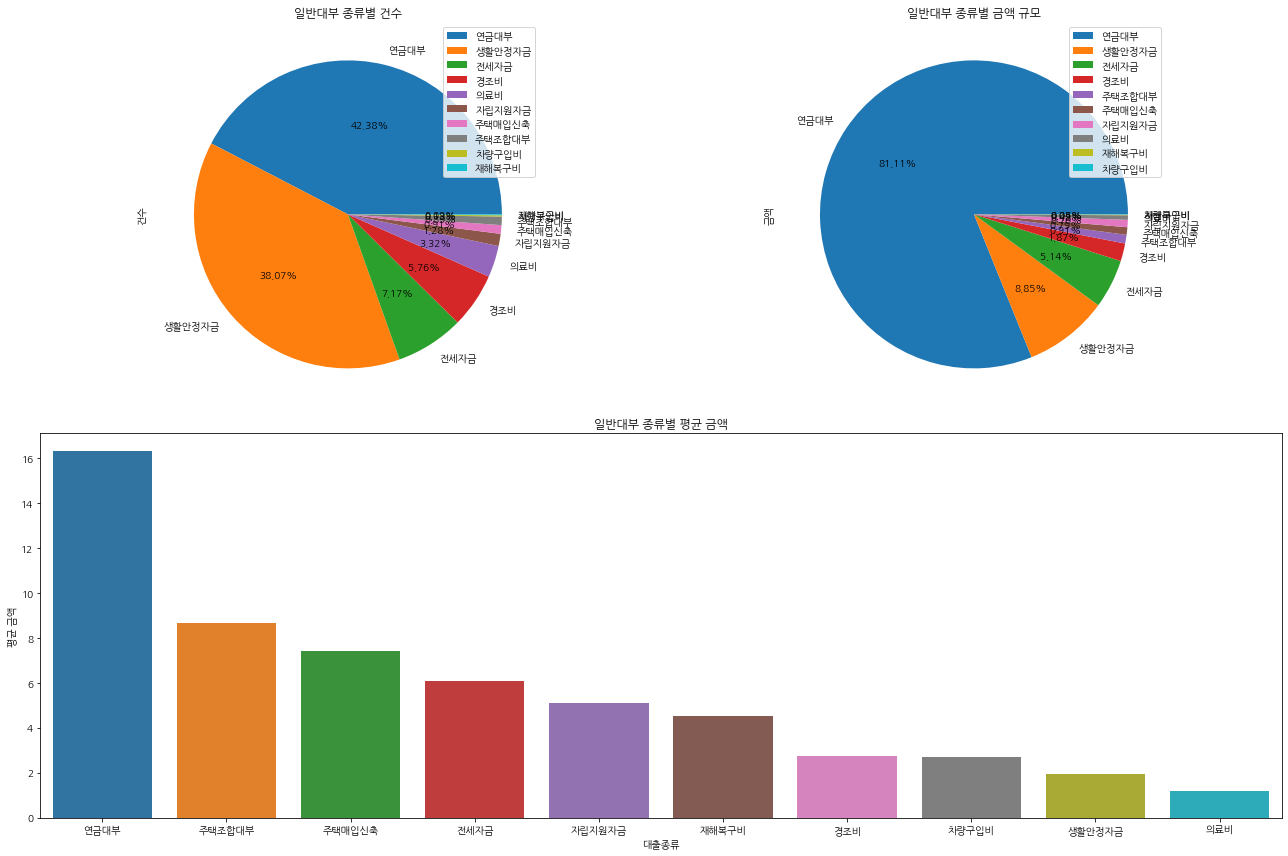

In [117]:
loans = np.array(['연금대부','생활안정자금','의료비','경조비','재해복구비','차량구입비','자립지원자금','전세자금','주택조합대부','주택매입신축'])
amount1 = df1[loans].sum().values
amount2 = df2[loans].sum().values

pie_df1 = pd.DataFrame(columns=['대출종류','건수'])
pie_df1['대출종류'] = loans
pie_df1['건수'] = amount1
pie_df1 = pie_df1.sort_values('건수',ascending=False)

pie_df2 = pd.DataFrame(columns=['대출종류','금액'])
pie_df2['대출종류'] = loans
pie_df2['금액'] = amount2
pie_df2 = pie_df2.sort_values('금액',ascending=False)

sub_df = pd.DataFrame(columns=['대출종류','평균 금액'])
sub_df['대출종류'] = loans
sub_df['평균 금액'] = amount2/amount1
sub_df = sub_df.sort_values('평균 금액',ascending=False)

fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

pie_df1.plot.pie(y='건수',labels=pie_df1['대출종류'].values,autopct='%.2f%%',ax=ax1,title='일반대부 종류별 건수')
pie_df2.plot.pie(y='금액',labels=pie_df2['대출종류'].values,autopct='%.2f%%',ax=ax2,title='일반대부 종류별 금액 규모')
sns.barplot(data=sub_df,x='대출종류',y='평균 금액',ax=ax3).set(title='일반대부 종류별 평균 금액')
plt.tight_layout()

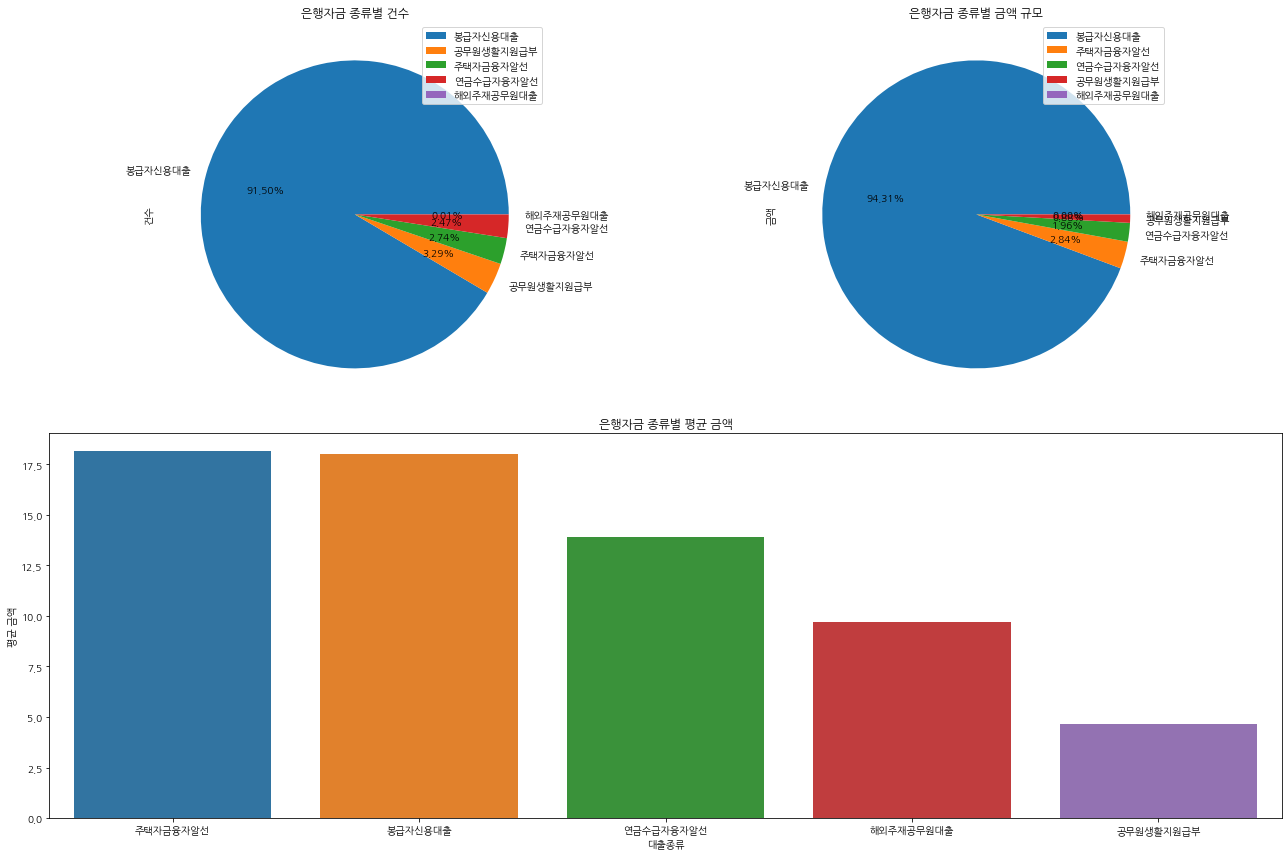

In [118]:
loans = np.array(['봉급자신용대출','공무원생활지원급부','해외주재공무원대출','연금수급자융자알선','주택자금융자알선'])
amount1 = df1[loans].sum().values
amount2 = df2[loans].sum().values

pie_df1 = pd.DataFrame(columns=['대출종류','건수'])
pie_df1['대출종류'] = loans
pie_df1['건수'] = amount1
pie_df1 = pie_df1.sort_values('건수',ascending=False)

pie_df2 = pd.DataFrame(columns=['대출종류','금액'])
pie_df2['대출종류'] = loans
pie_df2['금액'] = amount2
pie_df2 = pie_df2.sort_values('금액',ascending=False)

sub_df = pd.DataFrame(columns=['대출종류','평균 금액'])
sub_df['대출종류'] = loans
sub_df['평균 금액'] = amount2/amount1
sub_df = sub_df.sort_values('평균 금액',ascending=False)

fig = plt.figure(figsize=(18,12))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

pie_df1.plot.pie(y='건수',labels=pie_df1['대출종류'].values,autopct='%.2f%%',ax=ax1,title='은행자금 종류별 건수')
pie_df2.plot.pie(y='금액',labels=pie_df2['대출종류'].values,autopct='%.2f%%',ax=ax2,title='은행자금 종류별 금액 규모')
sns.barplot(data=sub_df,x='대출종류',y='평균 금액',ax=ax3).set(title='은행자금 종류별 평균 금액')
plt.tight_layout()